In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [2]:
data = yf.download("TATAMOTORS.NS", start="2012-01-01", end="2024-01-01", progress=False)
# data.head(10)

In [3]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [4]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(5)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,224.096344,227.509735,223.700592,223.342148,50.232681,223.021512,241.593442,252.365132,3.954315,1,232.849182
1,228.894867,236.958389,228.647522,232.849182,56.989518,224.282873,241.487944,252.151895,-2.119598,0,235.481888
2,237.601486,243.191528,237.156265,235.481888,58.655023,225.678520,241.437434,251.976866,-6.490875,0,233.336731
3,239.827606,243.389404,229.191696,233.336731,56.736981,226.733948,241.344821,251.775325,-7.622482,0,226.169861
4,233.792343,234.385971,228.301239,226.169861,50.791680,226.996287,241.110043,251.480135,-6.085419,0,222.562103


In [5]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.23307896 0.23241405 0.23714099 ... 0.49626578 1.         0.23466656]
 [0.24017579 0.24608695 0.24446381 ... 0.4167342  0.         0.23834942]
 [0.25305255 0.25510676 0.25705909 ... 0.35949688 0.         0.23534858]
 ...
 [0.97744583 0.9559366  0.9667678  ... 0.61340053 1.         0.94537339]
 [0.97833317 0.97670207 0.97942423 ... 0.59179518 1.         0.96355895]
 [1.         1.         1.         ... 0.77118258 1.         1.        ]]


In [7]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2808
[[[0.23307896 0.23241405 0.23714099 ... 0.22740226 0.24676494 0.27086195]
  [0.24017579 0.24608695 0.24446381 ... 0.22937314 0.24657309 0.27044671]
  [0.25305255 0.25510676 0.25705909 ... 0.23155384 0.24648124 0.27010586]
  ...
  [0.28941473 0.29261774 0.29132992 ... 0.2576601  0.24539362 0.26328938]
  [0.30594964 0.31738642 0.30831889 ... 0.26249863 0.24662018 0.26397095]
  [0.30448639 0.30185228 0.30517009 ... 0.2662359  0.24766748 0.26453248]]

 [[0.24017579 0.24608695 0.24446381 ... 0.22937314 0.24657309 0.27044671]
  [0.25305255 0.25510676 0.25705909 ... 0.23155384 0.24648124 0.27010586]
  [0.25634489 0.2553931  0.24526933 ... 0.23320295 0.24631282 0.26971339]
  ...
  [0.30594964 0.31738642 0.30831889 ... 0.26249863 0.24662018 0.26397095]
  [0.30448639 0.30185228 0.30517009 ... 0.2662359  0.24766748 0.26453248]
  [0.29526779 0.30185228 0.29814019 ... 0.2693375  0.24862635 0.2650381 ]]

 [[0.25305255 0.25510676 0.25705909 ... 0.23155384 0.24648124 0.27010586]
  [0.25634489 0.2

In [8]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [9]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2222
(2222, 30, 8)
(556, 30, 8)
(2222, 1)
(556, 1)
[[0.28465823]
 [0.28227118]
 [0.27572379]
 ...
 [0.3681593 ]
 [0.36948412]
 [0.37380719]]


In [13]:
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, TimeDistributed
import numpy as np

In [14]:
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(300, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
134/134 [==============================] - 9s 50ms/step - loss: 0.0041 - val_loss: 3.8424e-04
Epoch 2/30
134/134 [==============================] - 7s 51ms/step - loss: 3.7471e-04 - val_loss: 3.5102e-04
Epoch 3/30
134/134 [==============================] - 6s 47ms/step - loss: 3.9001e-04 - val_loss: 3.5004e-04
Epoch 4/30
134/134 [==============================] - 6s 48ms/step - loss: 3.5482e-04 - val_loss: 3.3762e-04
Epoch 5/30
134/134 [==============================] - 7s 50ms/step - loss: 3.6202e-04 - val_loss: 4.8813e-04
Epoch 6/30
134/134 [==============================] - 6s 44ms/step - loss: 3.3429e-04 - val_loss: 4.1207e-04
Epoch 7/30
134/134 [==============================] - 6s 47ms/step - loss: 3.2228e-04 - val_loss: 4.7724e-04
Epoch 8/30
134/134 [==============================] - 6s 45ms/step - loss: 3.3113e-04 - val_loss: 3.3876e-04
Epoch 9/30
134/134 [==============================] - 6s 45ms/step - loss: 3.4958e-04 - val_loss: 3.3901e-04
Epoch 10/30
134/134 [==

In [17]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 [==============================] - 1s 77ms/step
[0.3750452] [0.37373748]
[0.3805151] [0.38587001]
[0.3808113] [0.3899839]
[0.39205548] [0.37757247]
[0.39701203] [0.43398171]
[0.3808519] [0.44297656]
[0.42131397] [0.48871752]
[0.4401151] [0.49582971]
[0.46845326] [0.6158301]
[0.48754314] [0.60286087]


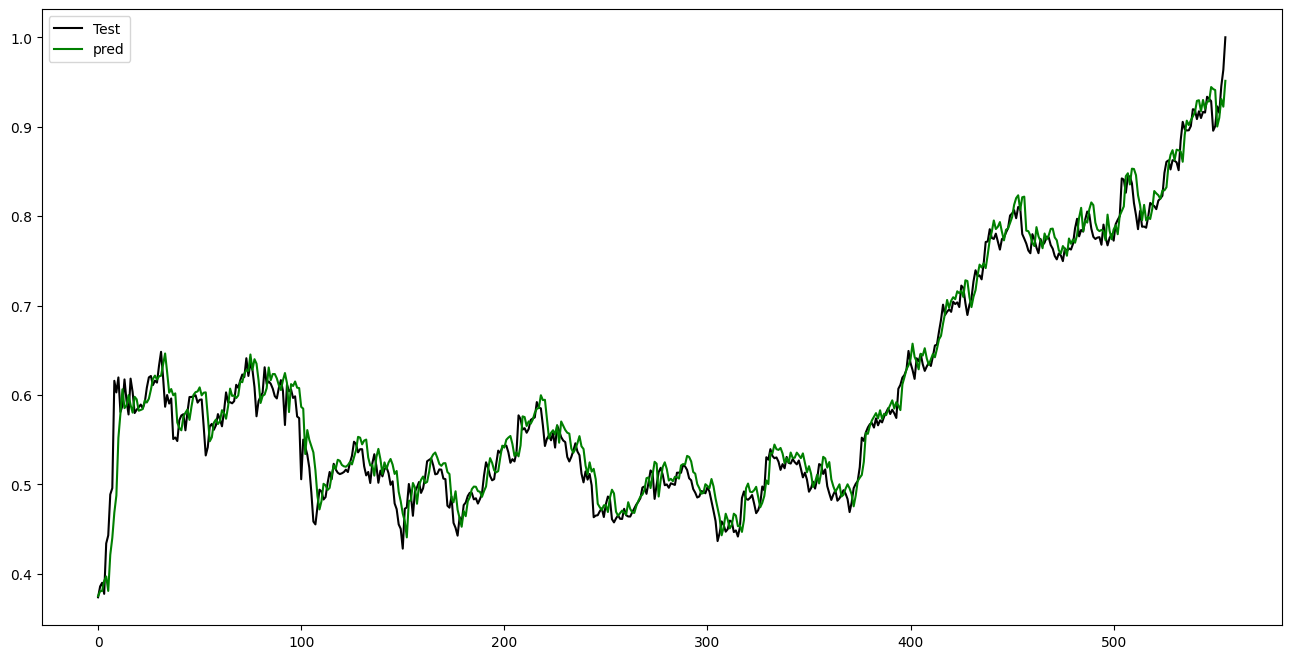

In [18]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()